In [11]:
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 10

# What do you feel like listening to?



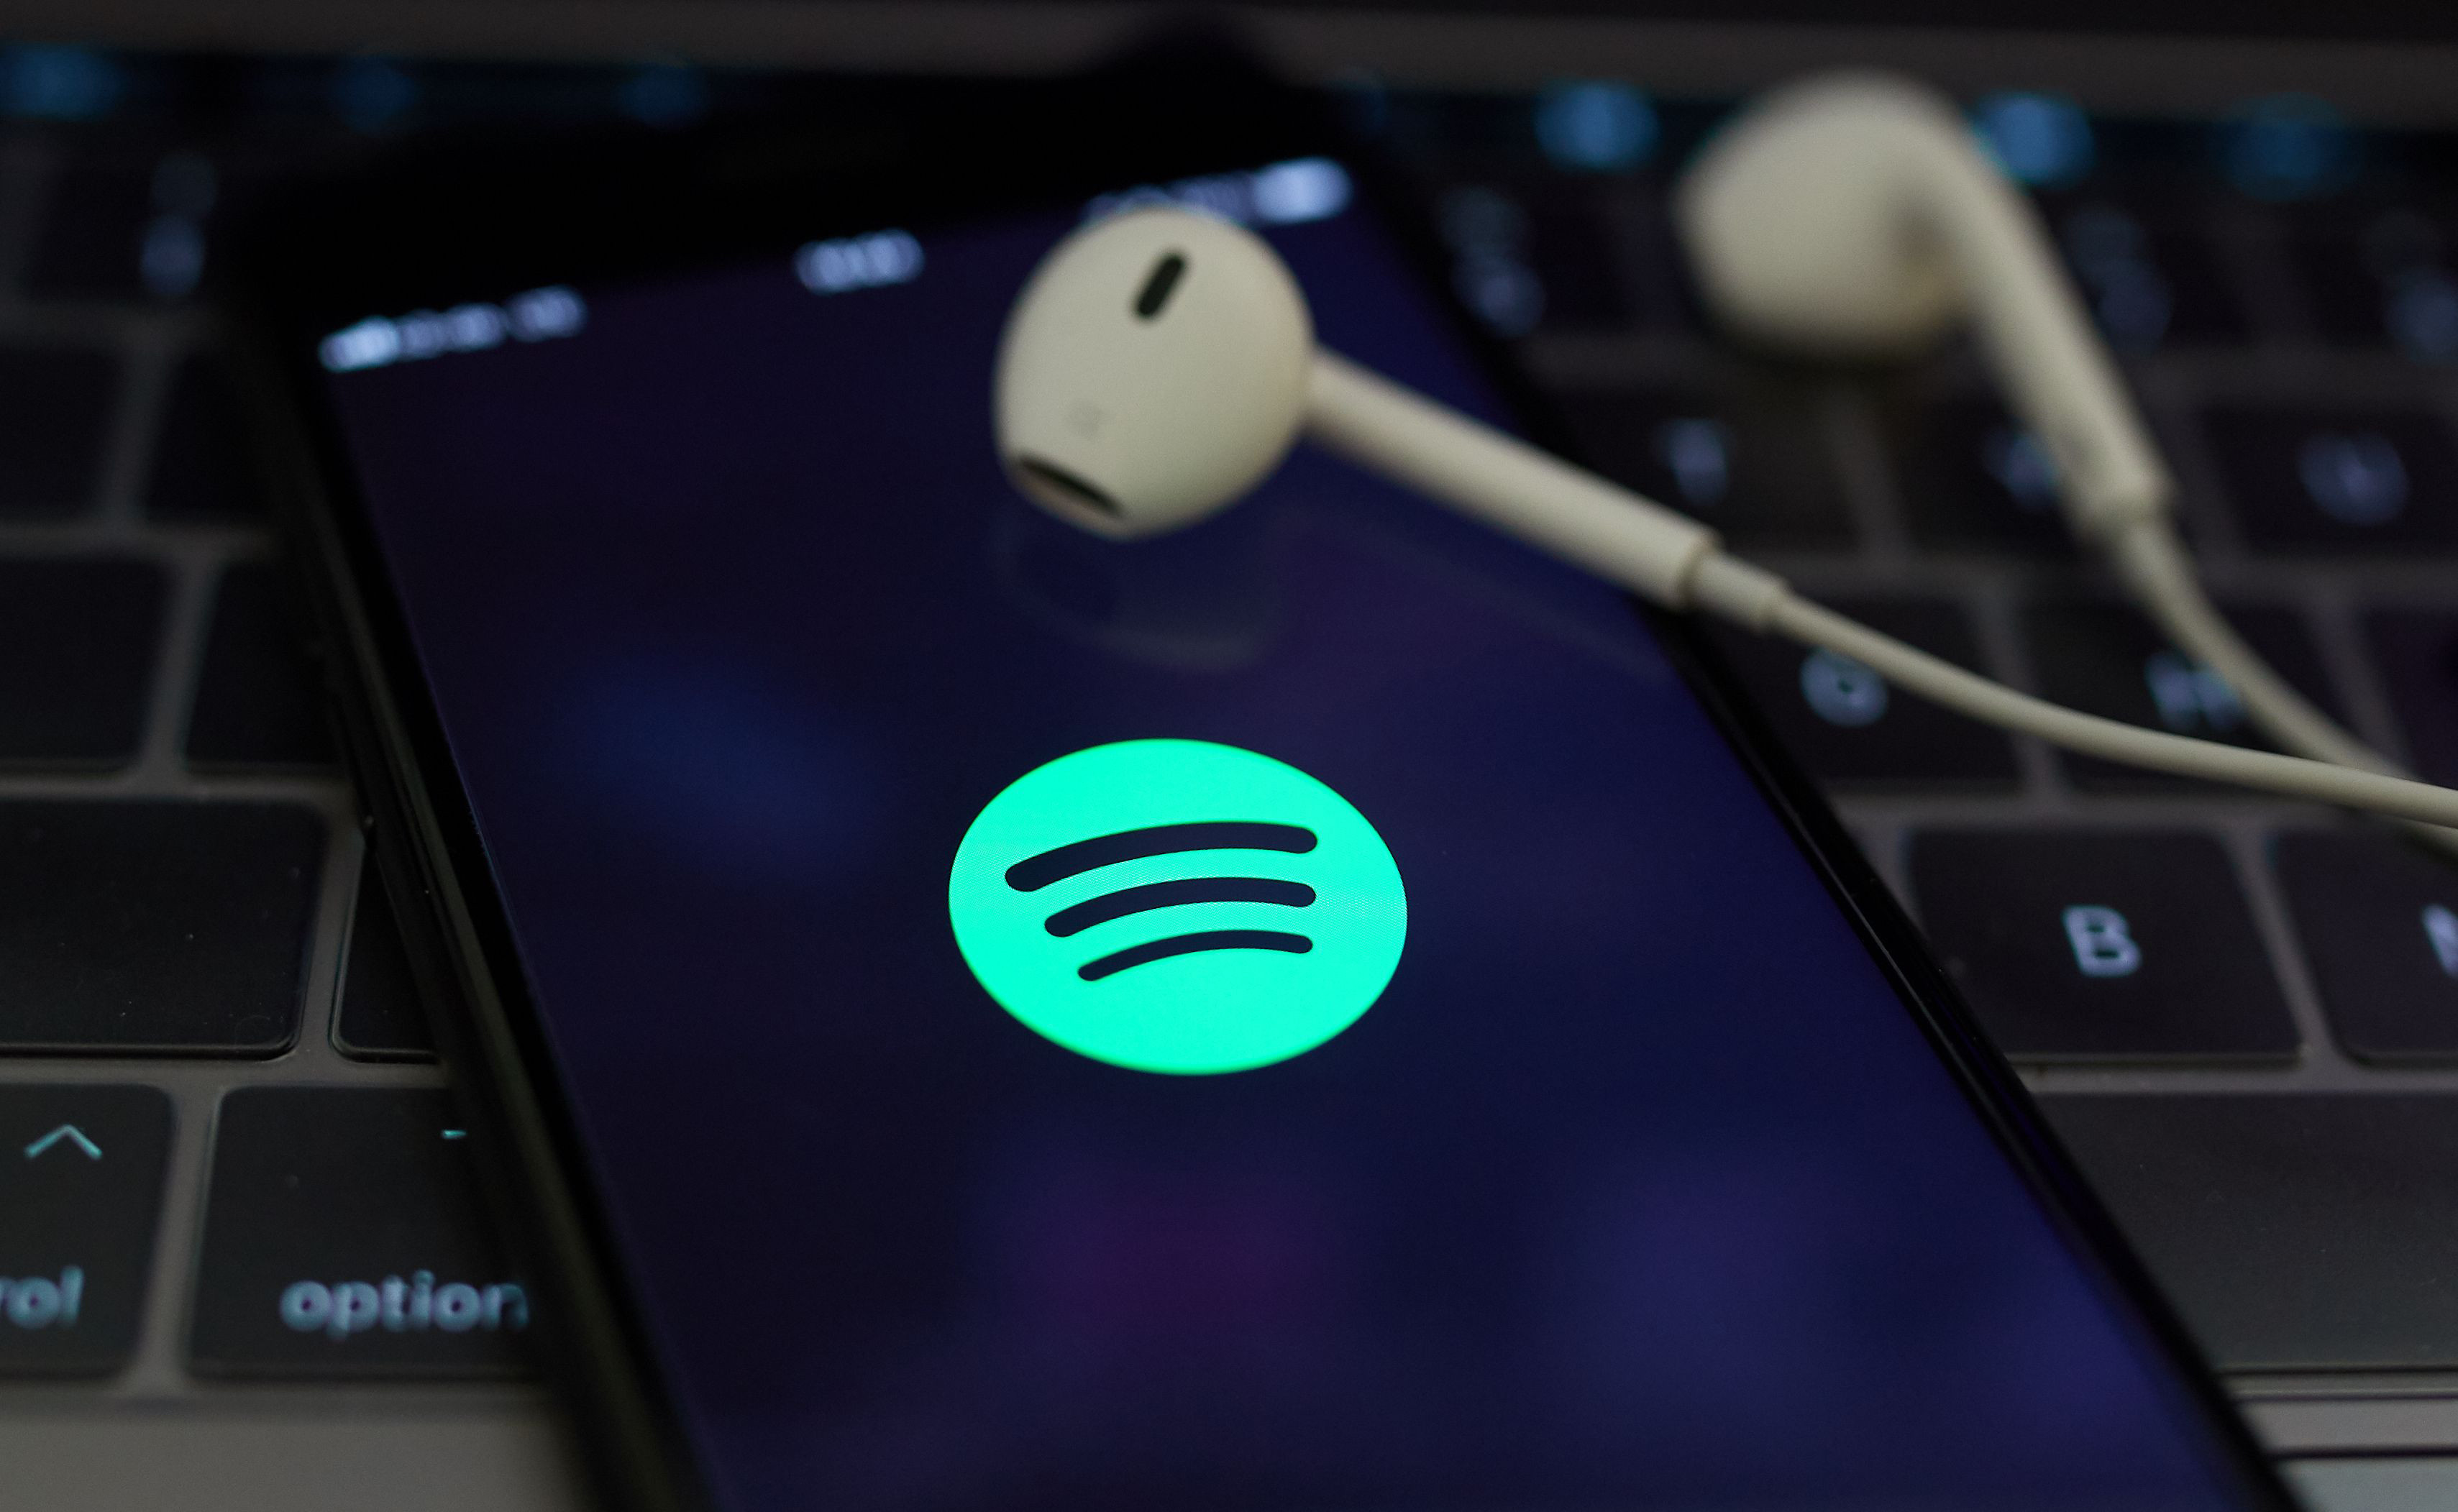

In [3]:
Image("spotify_img.jpg")

## Research Question
- ### Can we accurately determine whether a song feels happy or sad? 

## Part 1: Gathering and Cleaning Data
- Participant's song Title, Artist and Sentiment data(csv).
- Musical and auditory attributes of songs(api/json) [Spotify Web API](https://developer.spotify.com/documentation/web-api/reference/).

In [4]:
import pandas as pd
import numpy as np
user_df = pd.read_csv("https://raw.githubusercontent.com/jallen182/Data301/master/songs6.csv")
user_df.head()

,Name,Title,Artist,Sad/Happy
0,Stephanie,Distance,Cake,H
1,Stephanie,Let's Stay Together,Al Green,H
2,Stephanie,Blood on your bootheels,Caroline Rose,H
3,Stephanie,FM,Steely Dan,H
4,Stephanie,Valley of the silver moon,Jonathon Wilson,S


In [10]:
spotify_df = pd.read_csv("clean_data3.csv")
spotify_df = spotify_df.drop(columns='Unnamed: 0')
spotify_df[spotify_df["Name"] == "Stephanie"]

,Name,Title,Artist,Sad/Happy,parent,album,artists,available_markets,disc_number,duration_ms,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,time_signature
0,Stephanie,Distance,Cake,H,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'BE', 'BG', 'BH', 'BO', 'BR...",1,179653,...,0,0.0891,0.00796,0.002190,0.0558,0.888,183.048,https://api.spotify.com/v1/tracks/0xMEF2WiqKWT...,https://api.spotify.com/v1/audio-analysis/0xME...,4
1,Stephanie,Let's Stay Together,Al Green,H,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'BE', 'BG', 'BH', 'BO...",1,199396,...,0,0.0522,0.57000,0.011500,0.0542,0.507,101.985,https://api.spotify.com/v1/tracks/63xdwScd1Ai1...,https://api.spotify.com/v1/audio-analysis/63xd...,4
2,Stephanie,Blood on your bootheels,Caroline Rose,H,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AT', 'BE', 'BG', 'CA', 'CH', 'CY', 'CZ...",1,195320,...,1,0.1250,0.14400,0.000000,0.0932,0.860,160.176,https://api.spotify.com/v1/tracks/5qfPr1jisW3b...,https://api.spotify.com/v1/audio-analysis/5qfP...,4
3,Stephanie,FM,Steely Dan,H,NaN,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"['CA', 'MX', 'US']",1,290160,...,0,0.0295,0.13500,0.001940,0.0946,0.717,109.383,https://api.spotify.com/v1/tracks/0zw5bUUdOxVL...,https://api.spotify.com/v1/audio-analysis/0zw5...,4
4,Stephanie,Valley of the silver moon,Jonathon Wilson,S,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['CA', 'MX', 'US']",1,632293,...,1,0.0302,0.54300,0.789000,0.0834,0.134,107.834,https://api.spotify.com/v1/tracks/30pUYzSBJ2tB...,https://api.spotify.com/v1/audio-analysis/30pU...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,Stephanie,The Mystery of Love,Prefab Sprout,S,5vmRQ3zELMLUQPo2FLQ76x,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,277693,...,1,0.0242,0.22100,0.007840,0.0782,0.337,105.028,https://api.spotify.com/v1/tracks/5trtD6jDEqHK...,https://api.spotify.com/v1/audio-analysis/5trt...,4
359,Stephanie,Pretty As You Feel,Jefferson Airplane,S,4OMu5a8sFpcRCPCcsoEaov,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,269587,...,1,0.0429,0.75500,0.001630,0.1080,0.490,106.788,https://api.spotify.com/v1/tracks/7Caz24hQ36za...,https://api.spotify.com/v1/audio-analysis/7Caz...,4
360,Stephanie,Ayn,The Ocean Blue,H,10zlwR7kvVbD9OBkeZWr3L,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,214627,...,1,0.0303,0.00501,0.003270,0.1060,0.826,93.387,https://api.spotify.com/v1/tracks/0dH3H43FLiIU...,https://api.spotify.com/v1/audio-analysis/0dH3...,4
361,Stephanie,Put Your Money Where Your Mouth Is,Rose Royce,H,262qk9k0LTyMXmjH9YT2xU,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AT', 'AU', 'CA', 'DE', 'DK', 'FI', 'GB', 'IE...",1,205160,...,0,0.0585,0.21600,0.007290,0.0893,0.887,111.646,https://api.spotify.com/v1/tracks/6RhdsaIgl7bC...,https://api.spotify.com/v1/audio-analysis/6Rhd...,4


## Part 2: Data Exploration

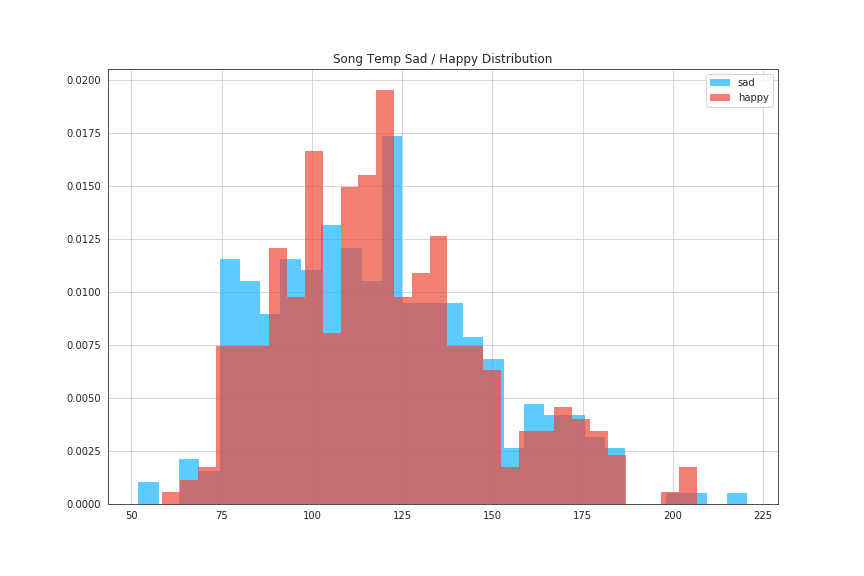

In [5]:
Image("fig1.png", unconfined=True)

## What features determine a songs emotional sentiment?

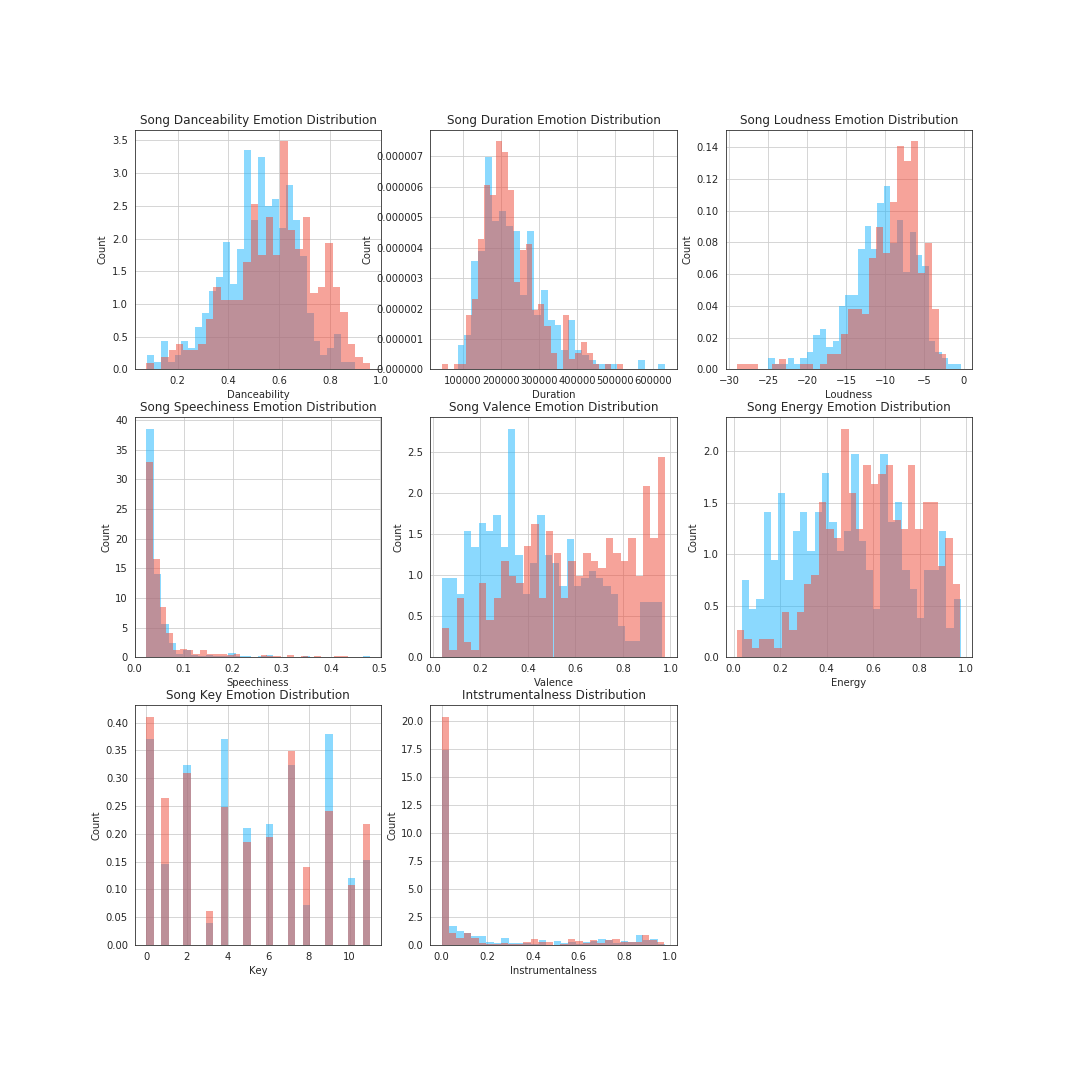

In [6]:
Image("fig2.png")

## What do these features mean?

**Valence:** “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with **high** valence sound more **positive** (e.g. happy, cheerful, euphoric), while tracks with **low** valence sound more **negative** (e.g. sad, depressed, angry).”


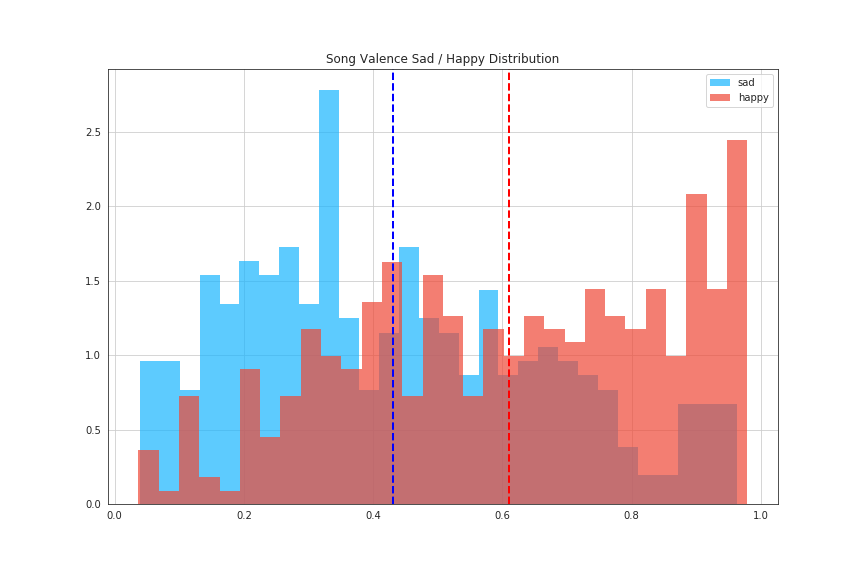

In [7]:
Image("fig10.png")

**Energy** is a measure from 0.0 to 1.0 and represents a perceptual measure of *intensity* and *activity*. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has *high* energy, while a Bach prelude scores *low* on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

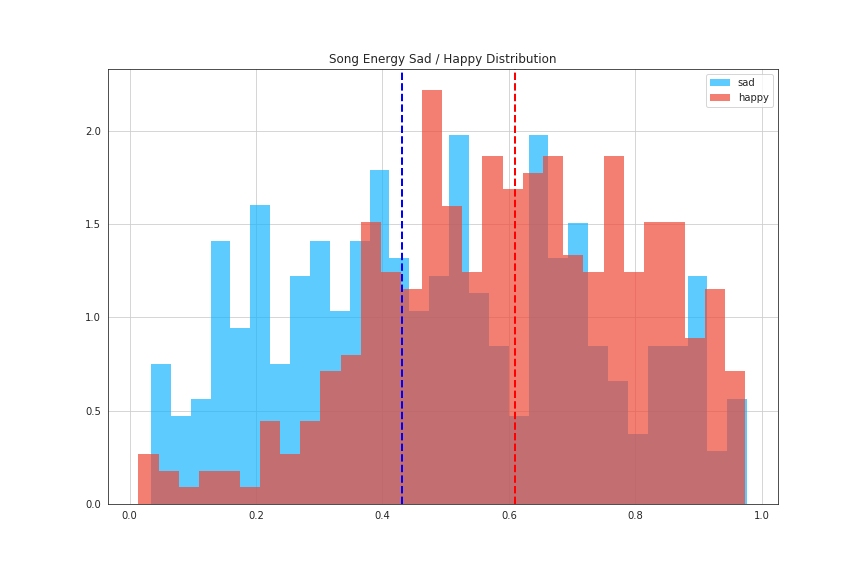

In [8]:
Image("fig11.png")

### Other important features

**Danceability** describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**Speechiness** detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

### Let's take another look at those graphs with these features in mind...

### User Specific Data

This is for all of the songs in our data set. What happens if we just look at a specific user? Will the graphs be different? For example, let's consider songs only submitted by Valen and Emily. 

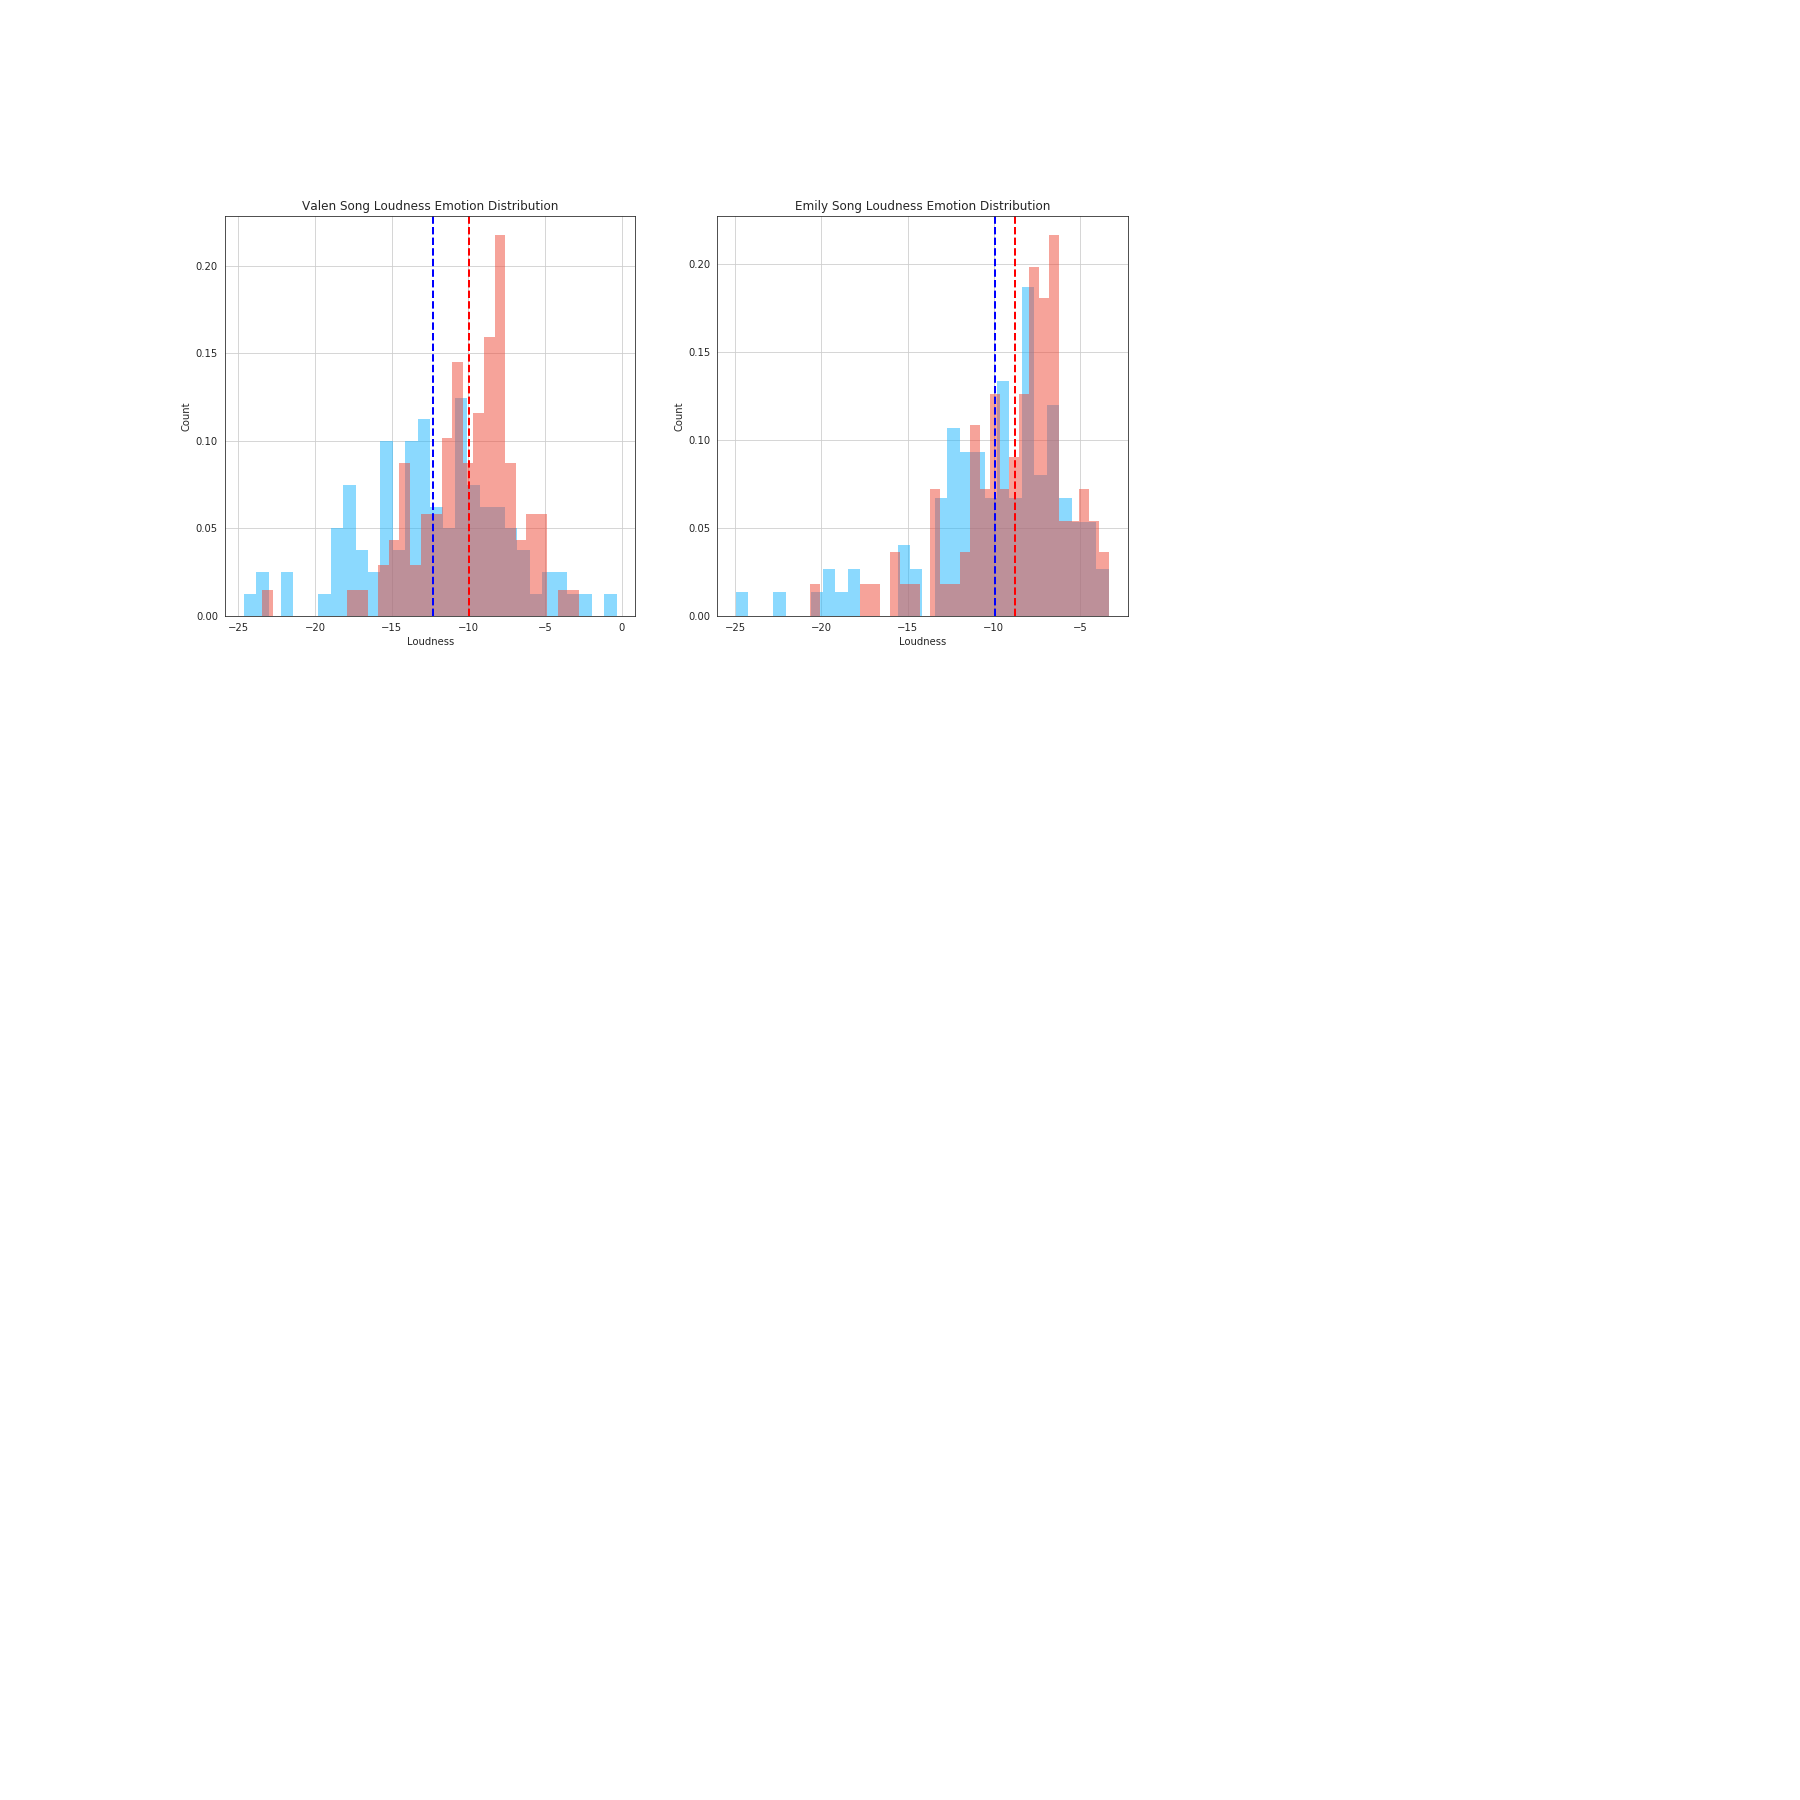

In [10]:
Image("fig9.png", unconfined=True)

## Part 3: Machine Learning

### What features determine a songs emotional sentiment?
- Valence
- Energy
- Loudness
- Danceability

In [29]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
features = ["danceability", "valence", "energy", "loudness"]

In [48]:
trainingData = spotify_df
train, test = train_test_split(trainingData, test_size=0.10)
print("Training size: {}, Test size: {}".format(len(train), len(test)))

Training size: 621, Test size: 69


In [50]:
x_train = train[features]
y_train = train["Sad/Happy"]
x_test = test[features]
y_test = test["Sad/Happy"]

### Model Parameters: ###
- **learning rate**: shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
- **n_estimators**: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=15, learning_rate=0.27, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
predicted = gbc.predict(x_test)
score = accuracy_score(y_test, predicted)*100
print("Accuracy using Gbc: ", round(score, 1), "%")

Accuracy using Gbc:  76.8 %


**GradientBoosting:** builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

## Generating our own playlist!

In [52]:
test_df = pd.read_csv("test_data.csv")
test_df = test_df.drop(columns='Unnamed: 0')
test_df.head()

,Name,Title,Artist,Sad/Happy,parent,album,artists,available_markets,disc_number,duration_ms,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,time_signature
0,Jeremy,Human Sadness,The Voidz,NaN,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,656836,...,1,0.0469,0.220000,0.80800,0.1130,0.132,121.623,https://api.spotify.com/v1/tracks/2avCzL6HtaJ5...,https://api.spotify.com/v1/audio-analysis/2avC...,4
1,Jeremy,Trailer Trash,Modest Mouse,NaN,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'BE', 'BG', 'BH', 'BO...",1,349600,...,1,0.0347,0.076400,0.00522,0.0618,0.714,163.619,https://api.spotify.com/v1/tracks/0WkhmPY4bLSi...,https://api.spotify.com/v1/audio-analysis/0Wkh...,4
2,Jeremy,Heroes,David Bowie,NaN,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,371413,...,1,0.0297,0.000671,0.48400,0.0920,0.435,112.114,https://api.spotify.com/v1/tracks/7Jh1bpe76CNT...,https://api.spotify.com/v1/audio-analysis/7Jh1...,4
3,Jeremy,I’m so lonesome I could cry,Hank Williams,NaN,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['CA', 'MX', 'US']",1,169067,...,1,0.0304,0.812000,0.00236,0.3440,0.369,112.033,https://api.spotify.com/v1/tracks/4tj7IsJrn4Mv...,https://api.spotify.com/v1/audio-analysis/4tj7...,3
4,Jeremy,Pale Blue Eyes,The Velvet Underground,NaN,NaN,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['CA', 'MX', 'US']",1,339533,...,1,0.0370,0.913000,0.00123,0.1030,0.310,82.641,https://api.spotify.com/v1/tracks/7urDSX97YCwD...,https://api.spotify.com/v1/audio-analysis/7urD...,4


In [54]:
pred = gbc.predict(test_df[features])
i = 0
for prediction in pred:
    print("Title:  {}\nArtist: {}\nEmotional Sentiment: {}\n".format(test_df["Title"][i],test_df["Artist"][i], prediction))
    i+=1

Title:  Human Sadness
Artist: The Voidz
Emotional Sentiment: S

Title:  Trailer Trash
Artist: Modest Mouse
Emotional Sentiment: H

Title:  Heroes
Artist: David Bowie
Emotional Sentiment: H

Title:  I’m so lonesome I could cry
Artist: Hank Williams
Emotional Sentiment: S

Title:  Pale Blue Eyes
Artist: The Velvet Underground
Emotional Sentiment: S

Title:  Folsom Prison Blues
Artist: Johnny Cash
Emotional Sentiment: H

Title:  Fell in Love with a girl
Artist: The White Stripes
Emotional Sentiment: H

Title:  Girlfriend
Artist: Ty Segall
Emotional Sentiment: H

Title:  Nerve Jamming
Artist: Bass Drum Of Death
Emotional Sentiment: S

Title:  Some Things Last a long time
Artist: Daniel Johnston
Emotional Sentiment: S

Title:  One
Artist: Harry Nilsson
Emotional Sentiment: S

Title:  Get Found
Artist: Bass Drum of Death
Emotional Sentiment: S

Title:  Zond
Artist: Pond
Emotional Sentiment: H

Title:  Ladies Of Cambridge
Artist: Vampire Weekend
Emotional Sentiment: H

Title:  Near Wild Heave

## How could we improve the model?
- ### Lyrics
- ### User-specific models
- ### Include different emotions

# Q&A